#File Upload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#Libary and Function

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 32
image_shape = (150, 150, 3)  # Image dimensions: 150x150 pixels with 3 color channels (RGB)
train_data_dir = '/content/drive/MyDrive/train'  # Directory containing training images
num_epochs = 10



# Data preprocessing and augmentation

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)



# Build the CNN model

In [ ]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])



# Compile the model

In [ ]:

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


# Train the model
# Calculate steps_per_epoch

In [ ]:


steps_per_epoch = train_generator.samples // batch_size

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs
)

# Predict probabilities for each image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()


batch_probabilities = model.predict(batch_images)



# Initialize lists to store accuracy data for cats and dogs

In [ ]:

cat_accuracies = []
dog_accuracies = []



# Separate images based on their labels and collect accuracy data

In [ ]:

for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(accuracy)
    else:  # Dog label
        dog_accuracies.append(accuracy)



# Plotting

In [ ]:


plt.figure(figsize=(10, 6))

# Plot line graph for cats
plt.plot(range(len(cat_accuracies)), cat_accuracies, marker='o', linestyle='-', color='blue', label='Cat')

# Plot line graph for dogs
plt.plot(range(len(cat_accuracies), len(cat_accuracies) + len(dog_accuracies)), dog_accuracies, marker='o', linestyle='-', color='green', label='Dog')

# Add labels and title
plt.xlabel('Image Index')
plt.ylabel('Accuracy')
plt.title('Accuracy of Images')
plt.legend()

plt.show()

# Directory containing training images

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
batch_size = 32
image_shape = (150, 150, 3)  # Image dimensions: 150x150 pixels with 3 color channels (RGB)
train_data_dir = '/content/drive/MyDrive/train'
num_epochs = 10

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=image_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Calculate steps_per_epoch
steps_per_epoch = train_generator.samples // batch_size

# Check if there are any remaining samples and adjust steps_per_epoch accordingly
if train_generator.samples % batch_size != 0:
    steps_per_epoch += 1

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=num_epochs
)


Found 10 images belonging to 2 classes.
Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 0.6936 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.2382 - accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 1s 990ms/step - loss: 0.6780 - accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 1s 881ms/step - loss: 0.6952 - accuracy: 0.4000
Epoch 5/10
1/1 [==============================] - 1s 739ms/step - loss: 0.6819 - accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 1s 709ms/step - loss: 0.6744 - accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 1s 710ms/step - loss: 0.6756 - accuracy: 0.6000
Epoch 8/10
1/1 [==============================] - 1s 697ms/step - loss: 0.6695 - accuracy: 0.6000
Epoch 9/10
1/1 [==============================] - 1s 754ms/step - loss: 0.6599 - accuracy: 0.6000
Epoch 10/10
1/1 [==============================] - 1s 716ms/step - loss: 0.6544 - ac

# Display the images along with their labels

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()


plt.figure(figsize=(10, 10))
for i in range(len(batch_labels)):
    plt.subplot(4, 8, i+1)
    plt.imshow(batch_images[i])
    plt.title('Cat' if batch_labels[i] == 0 else 'Dog')
    plt.axis('off')
plt.show()


# Separate images based on their labels

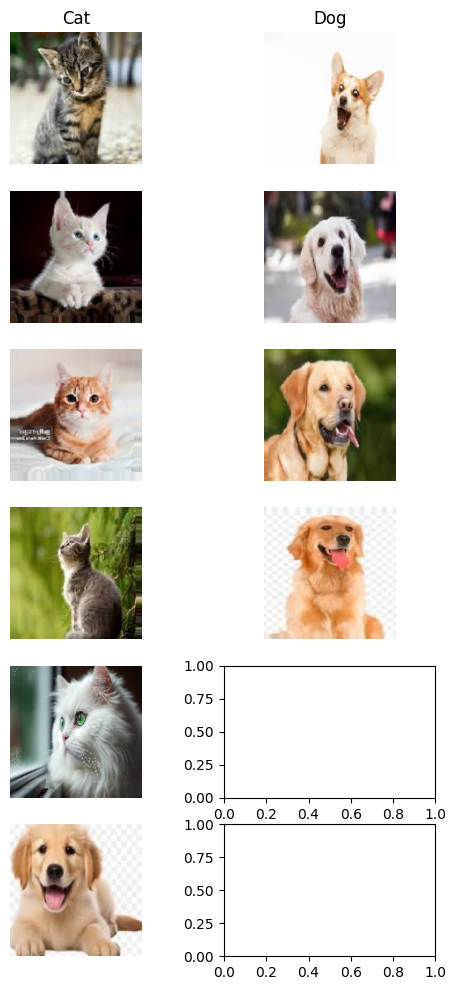

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Initialize two lists to store images of cats and dogs separately
cat_images = []
dog_images = []


for i in range(len(batch_labels)):
    if batch_labels[i] == 0:  # Cat label
        cat_images.append(batch_images[i])
    else:  # Dog label
        dog_images.append(batch_images[i])

# Create a table with two columns (Cat and Dog)
fig, ax = plt.subplots(len(cat_images), 2, figsize=(6, 12))

# Plot images of cats
for i, cat_image in enumerate(cat_images):
    ax[i, 0].imshow(cat_image)
    ax[i, 0].axis('off')

# Plot images of dogs
for i, dog_image in enumerate(dog_images):
    ax[i, 1].imshow(dog_image)
    ax[i, 1].axis('off')

# Set column headers
ax[0, 0].set_title('Cat')
ax[0, 1].set_title('Dog')

plt.show()


Create a table with three columns (Cat, Dog, Accuracy)

1/1 [==============================] - 0s 297ms/step


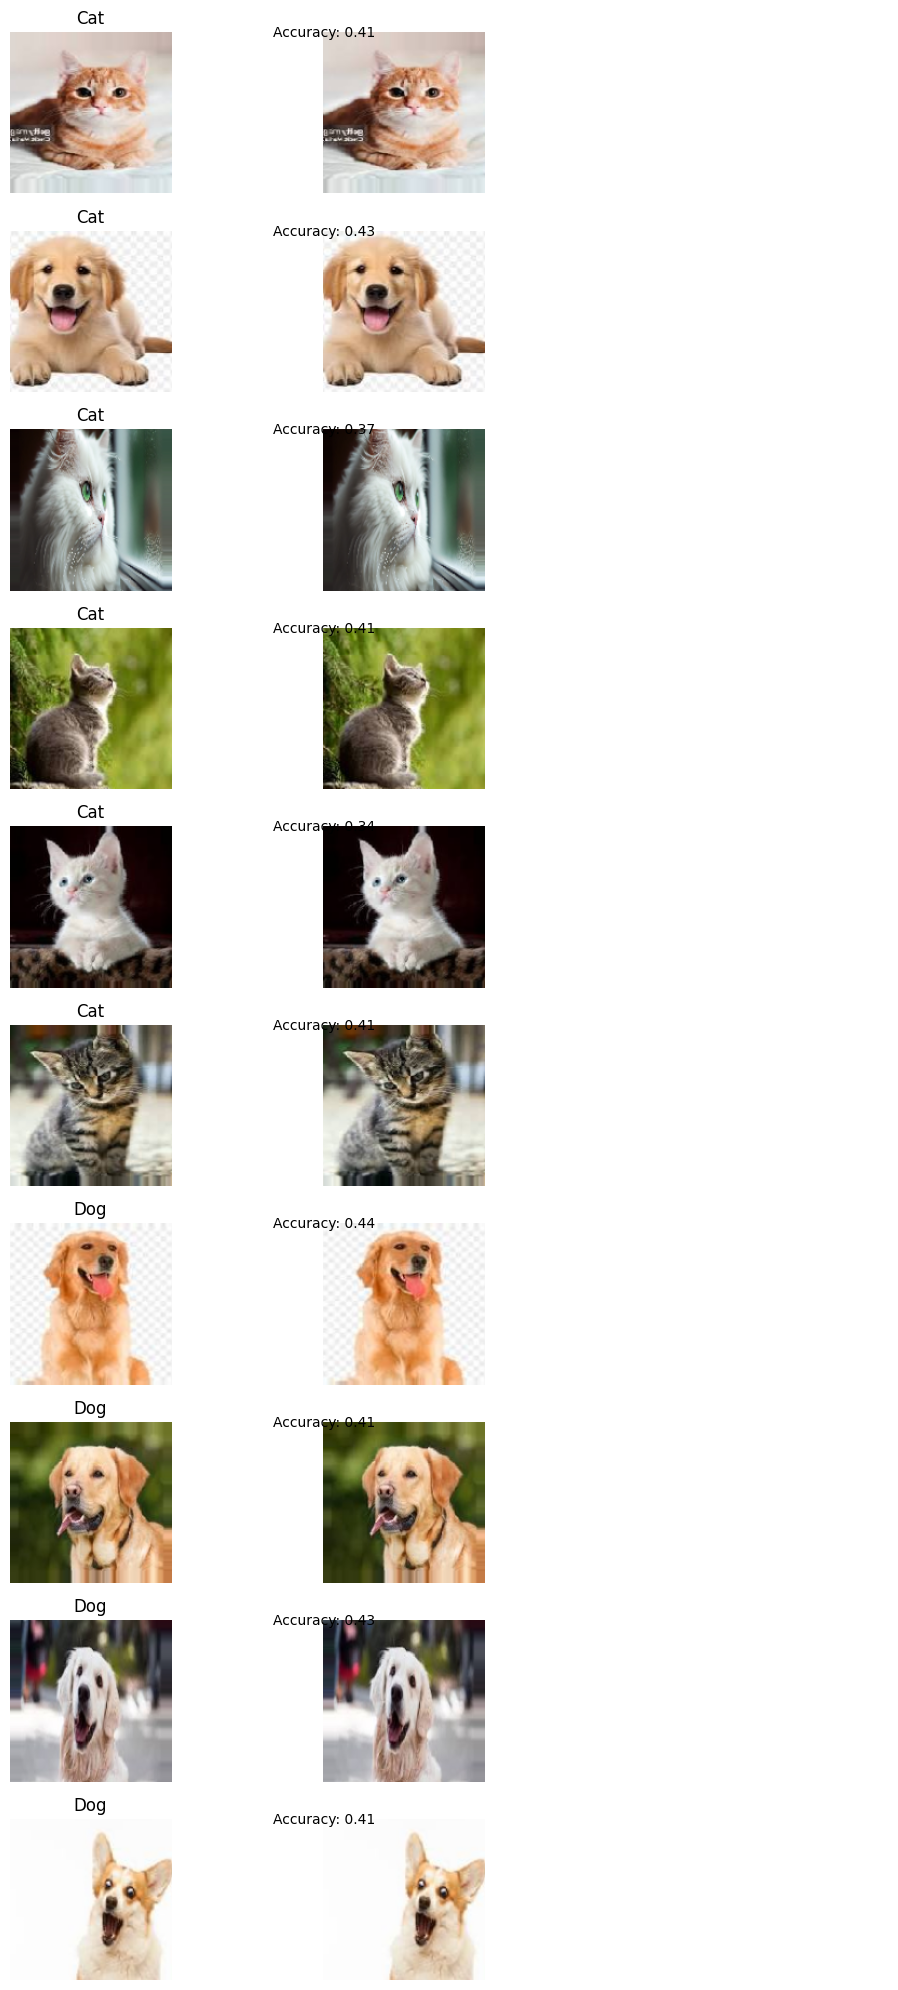

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize two lists to store images of cats and dogs separately
cat_images = []
dog_images = []

# Separate images based on their labels
for i in range(len(batch_labels)):
    if batch_labels[i] == 0:  # Cat label
        cat_images.append((batch_images[i], batch_probabilities[i]))
    else:  # Dog label
        dog_images.append((batch_images[i], batch_probabilities[i]))

# Create a table with three columns (Cat, Dog, Accuracy)
fig, ax = plt.subplots(len(cat_images) + len(dog_images), 3, figsize=(10, 20))

# Plot images of cats
for i, (cat_image, probability) in enumerate(cat_images):
    ax[i, 0].imshow(cat_image)
    ax[i, 0].axis('off')
    ax[i, 0].set_title('Cat')

    ax[i, 1].imshow(cat_image)
    ax[i, 1].axis('off')
    ax[i, 1].text(0.5, 0.5, f'Accuracy: {probability[0]:.2f}', fontsize=10, ha='center', va='center')

# Plot images of dogs
for i, (dog_image, probability) in enumerate(dog_images):
    j = i + len(cat_images)
    ax[j, 0].imshow(dog_image)
    ax[j, 0].axis('off')
    ax[j, 0].set_title('Dog')

    ax[j, 1].imshow(dog_image)
    ax[j, 1].axis('off')
    ax[j, 1].text(0.5, 0.5, f'Accuracy: {probability[0]:.2f}', fontsize=10, ha='center', va='center')

# Remove extra empty subplot
for i in range(len(cat_images) + len(dog_images)):
    ax[i, 2].axis('off')

plt.tight_layout()
plt.show()


# Plot images of cats

1/1 [==============================] - 0s 141ms/step


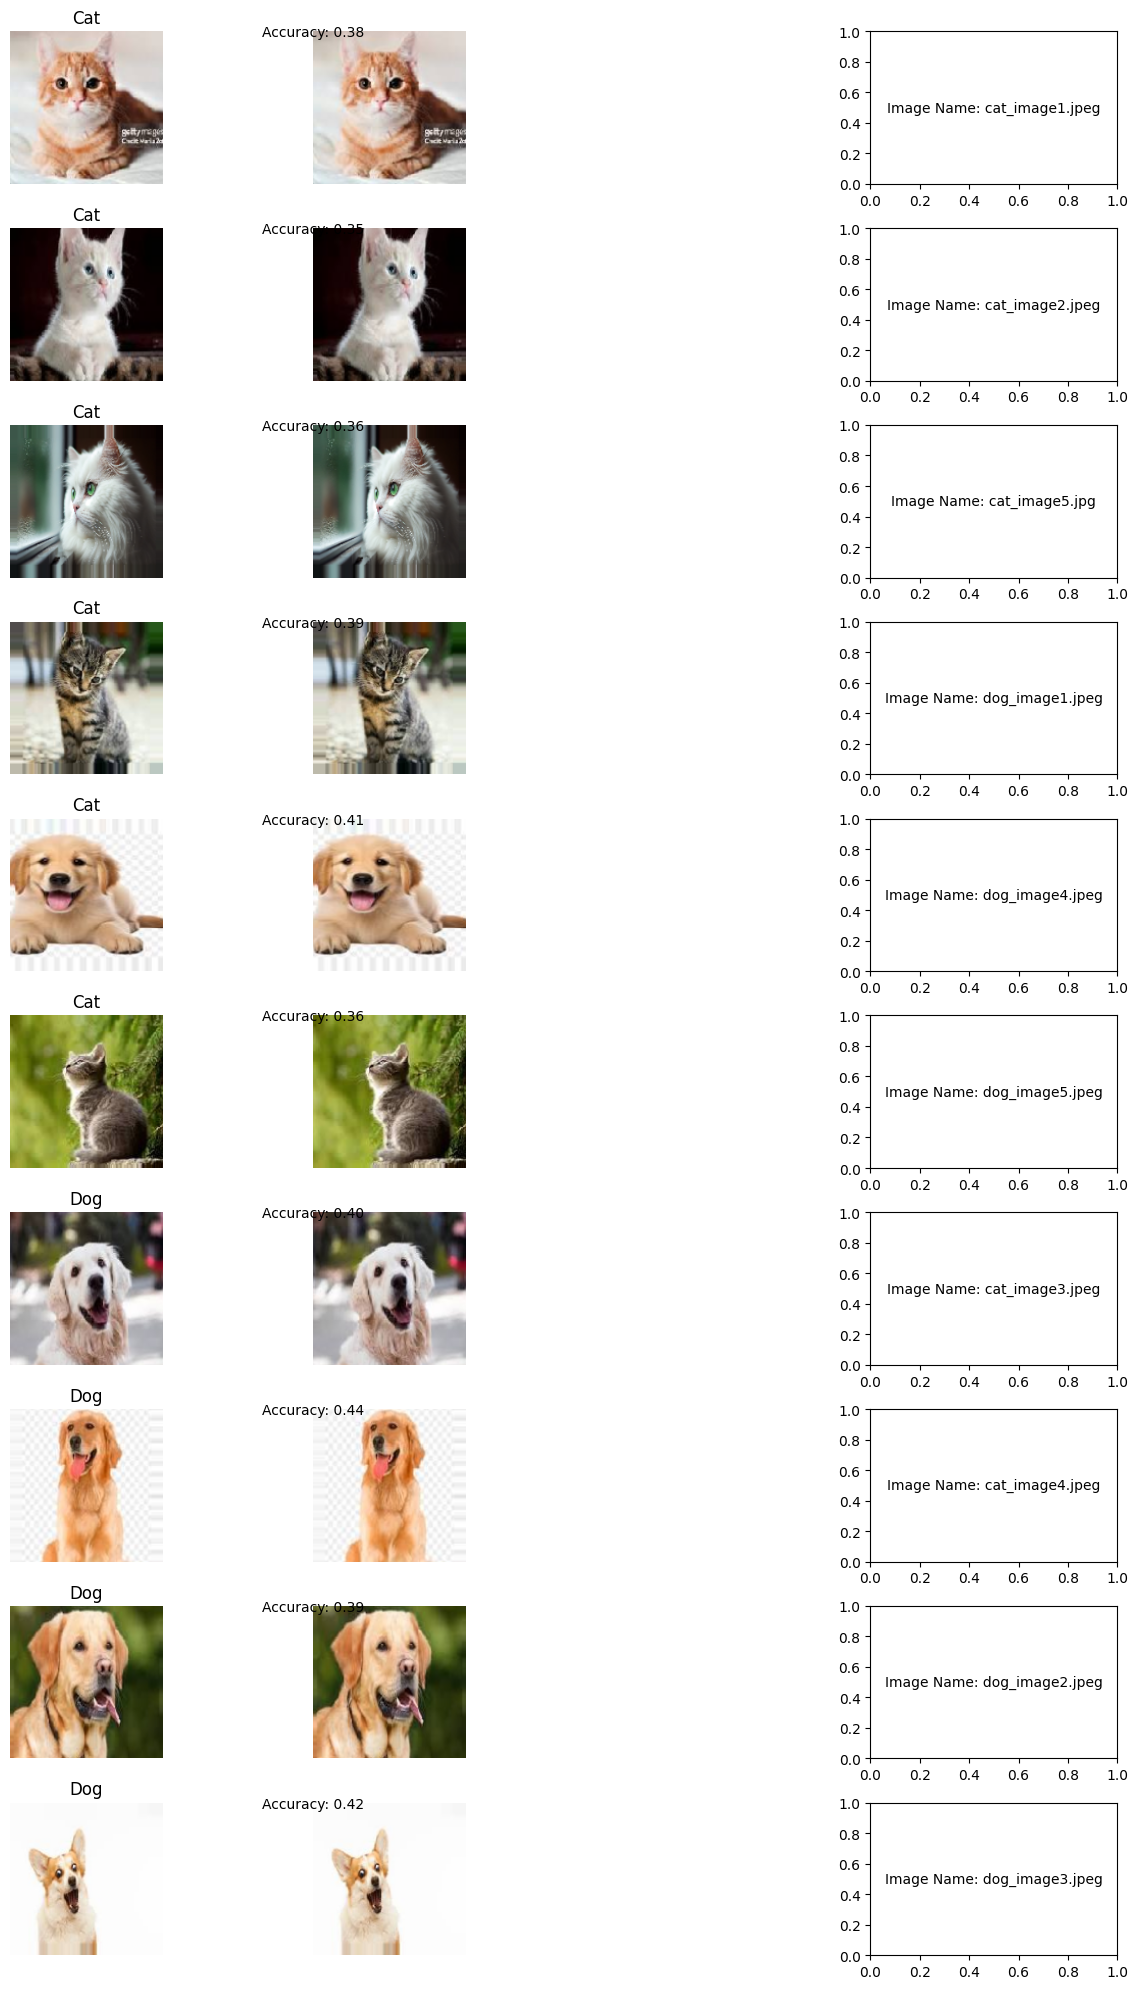

In [ ]:
import os
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize two lists to store images of cats and dogs separately
cat_images = []
dog_images = []

# Separate images based on their labels
for i in range(len(batch_labels)):
    if batch_labels[i] == 0:  # Cat label
        cat_images.append((batch_images[i], batch_probabilities[i], train_generator.filenames[i]))
    else:  # Dog label
        dog_images.append((batch_images[i], batch_probabilities[i], train_generator.filenames[i]))

# Create a table with four columns (Cat, Dog, Accuracy, Image Name)
fig, ax = plt.subplots(len(cat_images) + len(dog_images), 4, figsize=(12, 20))

# Plot images of cats
for i, (cat_image, probability, image_name) in enumerate(cat_images):
    ax[i, 0].imshow(cat_image)
    ax[i, 0].axis('off')
    ax[i, 0].set_title('Cat')

    ax[i, 1].imshow(cat_image)
    ax[i, 1].axis('off')
    ax[i, 1].text(0.5, 0.5, f'Accuracy: {probability[0]:.2f}', fontsize=10, ha='center', va='center')

    ax[i, 2].axis('off')  # Empty column for spacing
    ax[i, 3].text(0.5, 0.5, f'Image Name: {os.path.basename(image_name)}', fontsize=10, ha='center', va='center')

# Plot images of dogs
for i, (dog_image, probability, image_name) in enumerate(dog_images):
    j = i + len(cat_images)
    ax[j, 0].imshow(dog_image)
    ax[j, 0].axis('off')
    ax[j, 0].set_title('Dog')

    ax[j, 1].imshow(dog_image)
    ax[j, 1].axis('off')
    ax[j, 1].text(0.5, 0.5, f'Accuracy: {probability[0]:.2f}', fontsize=10, ha='center', va='center')

    ax[j, 2].axis('off')  # Empty column for spacing
    ax[j, 3].text(0.5, 0.5, f'Image Name: {os.path.basename(image_name)}', fontsize=10, ha='center', va='center')

plt.tight_layout()
plt.show()


# Plot the bar chart

1/1 [==============================] - 1s 605ms/step


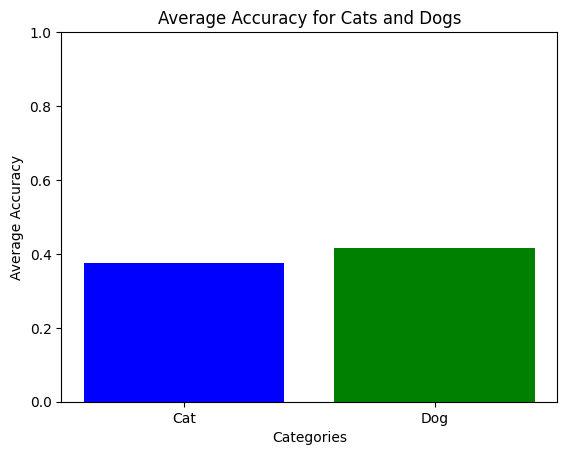

Cat Image Names:
cats/cat_image1.jpeg
cats/cat_image2.jpeg
cats/cat_image3.jpeg
cats/dog_image1.jpeg
dogs/dog_image3.jpeg
dogs/dog_image5.jpeg

Dog Image Names:
cats/cat_image4.jpeg
cats/cat_image5.jpg
dogs/dog_image2.jpeg
dogs/dog_image4.jpeg


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize two lists to store accuracies of cats and dogs separately
cat_accuracies = []
dog_accuracies = []

# Initialize two lists to store image names of cats and dogs separately
cat_image_names = []
dog_image_names = []

# Separate images based on their labels and collect accuracy and image names
for i in range(len(batch_labels)):
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(batch_probabilities[i][0])
        cat_image_names.append(train_generator.filenames[i])
    else:  # Dog label
        dog_accuracies.append(batch_probabilities[i][0])
        dog_image_names.append(train_generator.filenames[i])

# Calculate average accuracy for cats and dogs
avg_cat_accuracy = np.mean(cat_accuracies)
avg_dog_accuracy = np.mean(dog_accuracies)


categories = ['Cat', 'Dog']
avg_accuracies = [avg_cat_accuracy, avg_dog_accuracy]

plt.bar(categories, avg_accuracies, color=['blue', 'green'])
plt.xlabel('Categories')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy for Cats and Dogs')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for accuracy scores
plt.show()

# Display image names
print("Cat Image Names:")
for name in cat_image_names:
    print(name)

print("\nDog Image Names:")
for name in dog_image_names:
    print(name)


# Rotate x-axis labels for better readability

1/1 [==============================] - 0s 133ms/step


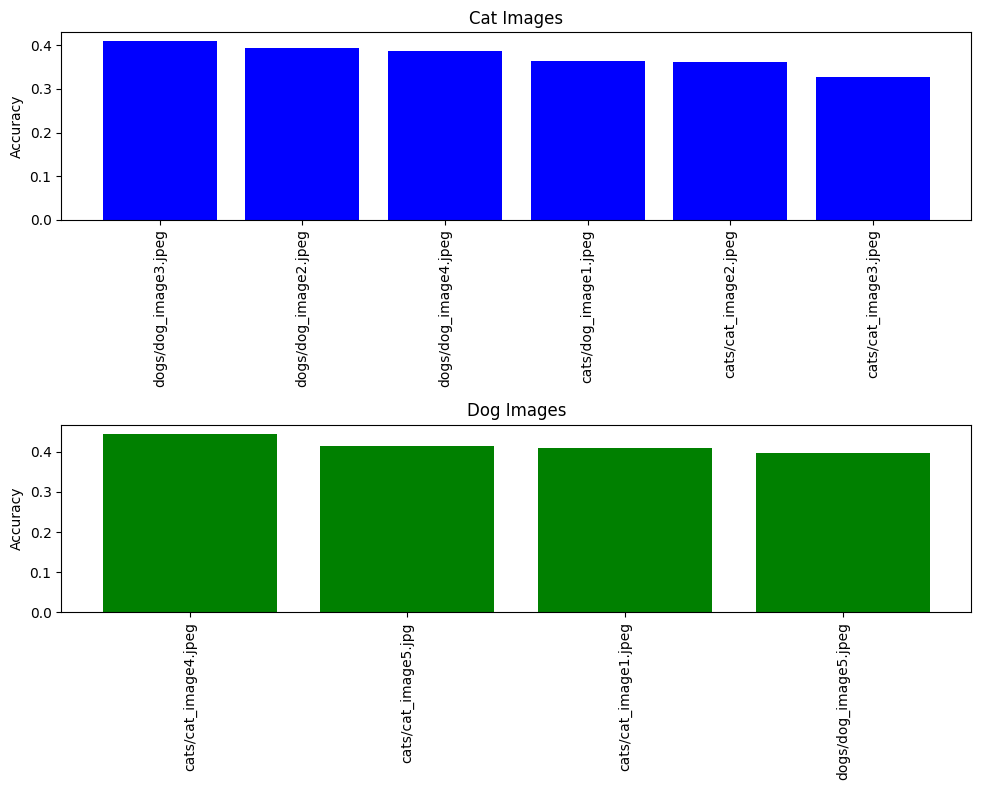

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy and image name data for cats and dogs
cat_data = []
dog_data = []

# Separate images based on their labels and collect accuracy and image names
for i in range(len(batch_labels)):
    image_name = train_generator.filenames[i]
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_data.append((image_name, accuracy))
    else:  # Dog label
        dog_data.append((image_name, accuracy))

# Sort data by accuracy (optional)
cat_data.sort(key=lambda x: x[1], reverse=True)
dog_data.sort(key=lambda x: x[1], reverse=True)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plotting Cats
cat_names, cat_accuracies = zip(*cat_data)
ax1.bar(cat_names, cat_accuracies, color='blue')
ax1.set_ylabel('Accuracy')
ax1.set_title('Cat Images')

# Plotting Dogs
dog_names, dog_accuracies = zip(*dog_data)
ax2.bar(dog_names, dog_accuracies, color='green')
ax2.set_ylabel('Accuracy')
ax2.set_title('Dog Images')


for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


# Separate images based on their labels and collect accuracy and image data

1/1 [==============================] - 0s 213ms/step


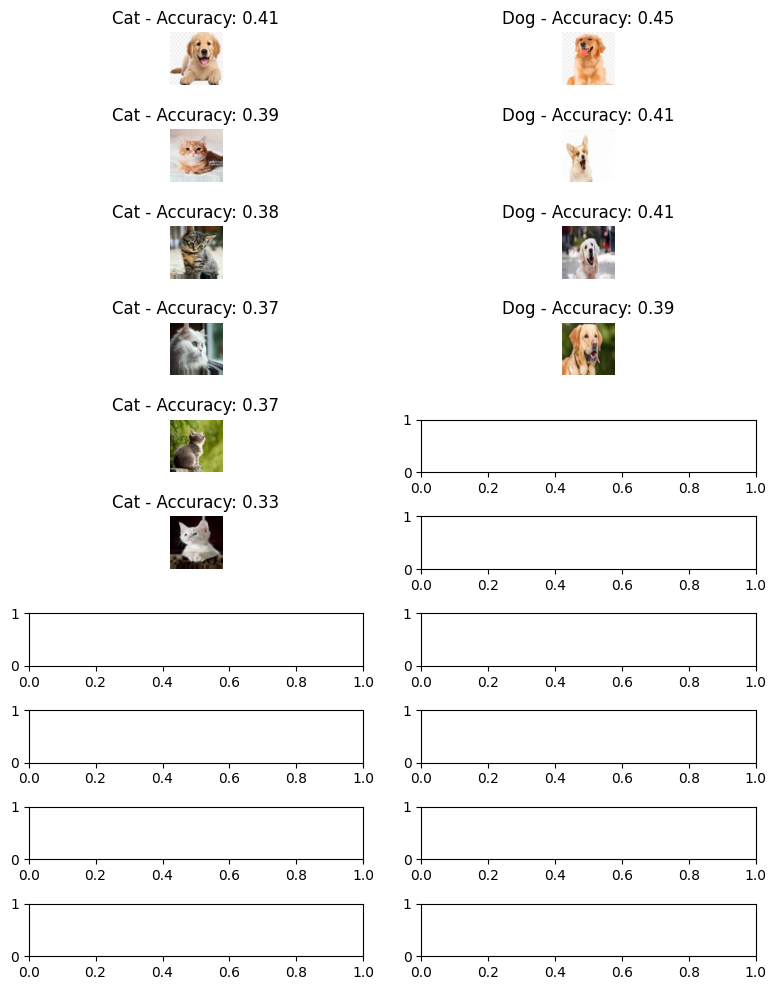

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy and image name data for cats and dogs
cat_data = []
dog_data = []

# Separate images based on their labels and collect accuracy and image data
for i in range(len(batch_labels)):
    image_name = train_generator.filenames[i]
    accuracy = batch_probabilities[i][0]
    image = batch_images[i]
    if batch_labels[i] == 0:  # Cat label
        cat_data.append((image_name, image, accuracy))
    else:  # Dog label
        dog_data.append((image_name, image, accuracy))

# Sort data by accuracy (optional)
cat_data.sort(key=lambda x: x[2], reverse=True)
dog_data.sort(key=lambda x: x[2], reverse=True)

# Plotting
fig, axes = plt.subplots(len(cat_data) + len(dog_data), 2, figsize=(8, 10))

# Plotting Cats
for i, (image_name, image, accuracy) in enumerate(cat_data):
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Cat - Accuracy: {accuracy:.2f}')
    axes[i, 0].axis('off')

# Plotting Dogs
for i, (image_name, image, accuracy) in enumerate(dog_data):
    axes[i, 1].imshow(image)
    axes[i, 1].set_title(f'Dog - Accuracy: {accuracy:.2f}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#Dogs

1/1 [==============================] - 0s 132ms/step


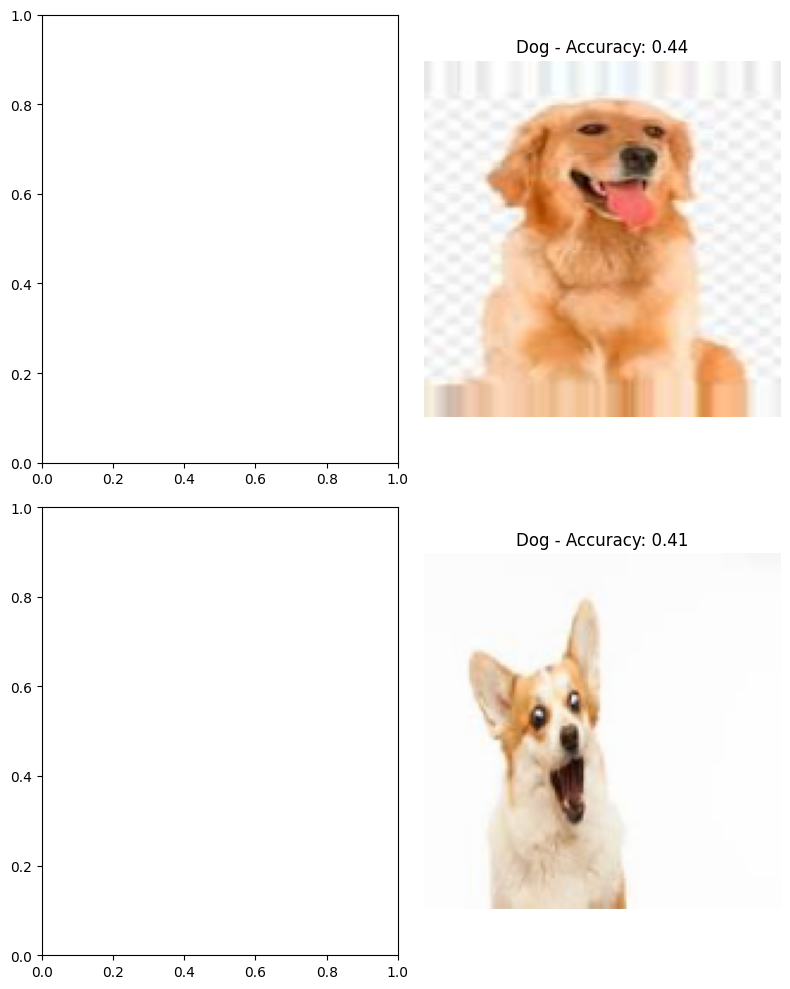

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store image data for cats and dogs with accuracy > 0.41
selected_cat_images = []
selected_dog_images = []

# Separate images based on their labels and collect image data with accuracy > 0.41
for i in range(len(batch_labels)):
    image_name = train_generator.filenames[i]
    accuracy = batch_probabilities[i][0]
    image = batch_images[i]
    if accuracy > 0.41:  # Filter images with accuracy > 0.41
        if batch_labels[i] == 0:  # Cat label
            selected_cat_images.append((image_name, image, accuracy))
        else:  # Dog label
            selected_dog_images.append((image_name, image, accuracy))

# Plotting
fig, axes = plt.subplots(len(selected_cat_images) + len(selected_dog_images), 2, figsize=(8, 10))

# Plotting Cats with accuracy > 0.41
for i, (image_name, image, accuracy) in enumerate(selected_cat_images):
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Cat - Accuracy: {accuracy:.2f}')
    axes[i, 0].axis('off')

# Plotting Dogs with accuracy > 0.41
for i, (image_name, image, accuracy) in enumerate(selected_dog_images):
    axes[i, 1].imshow(image)
    axes[i, 1].set_title(f'Dog - Accuracy: {accuracy:.2f}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Plotting Dogs with accuracy < 0.41

1/1 [==============================] - 0s 138ms/step


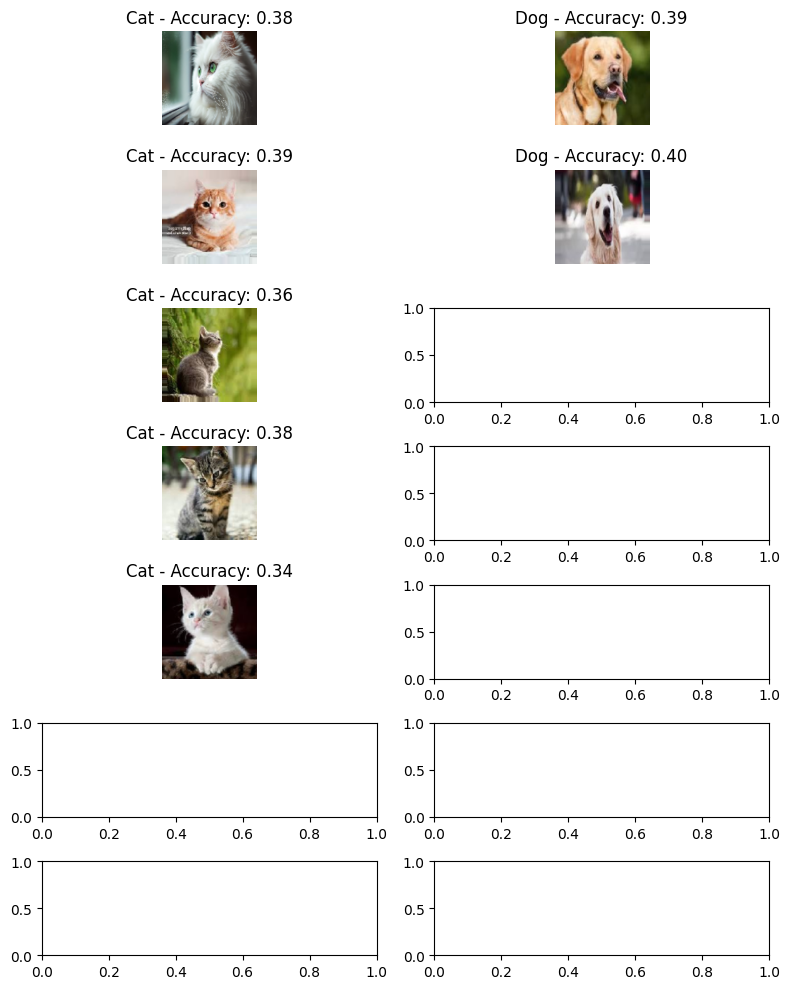

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store image data for cats and dogs with accuracy < 0.41
selected_cat_images = []
selected_dog_images = []

# Separate images based on their labels and collect image data with accuracy < 0.41
for i in range(len(batch_labels)):
    image_name = train_generator.filenames[i]
    accuracy = batch_probabilities[i][0]
    image = batch_images[i]
    if accuracy < 0.41:  # Filter images with accuracy < 0.41
        if batch_labels[i] == 0:  # Cat label
            selected_cat_images.append((image_name, image, accuracy))
        else:  # Dog label
            selected_dog_images.append((image_name, image, accuracy))

# Plotting
fig, axes = plt.subplots(len(selected_cat_images) + len(selected_dog_images), 2, figsize=(8, 10))

# Plotting Cats with accuracy < 0.41
for i, (image_name, image, accuracy) in enumerate(selected_cat_images):
    axes[i, 0].imshow(image)
    axes[i, 0].set_title(f'Cat - Accuracy: {accuracy:.2f}')
    axes[i, 0].axis('off')

# Plotting Dogs with accuracy < 0.41
for i, (image_name, image, accuracy) in enumerate(selected_dog_images):
    axes[i, 1].imshow(image)
    axes[i, 1].set_title(f'Dog - Accuracy: {accuracy:.2f}')
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Calculate average accuracy for cats and dogs

1/1 [==============================] - 0s 127ms/step


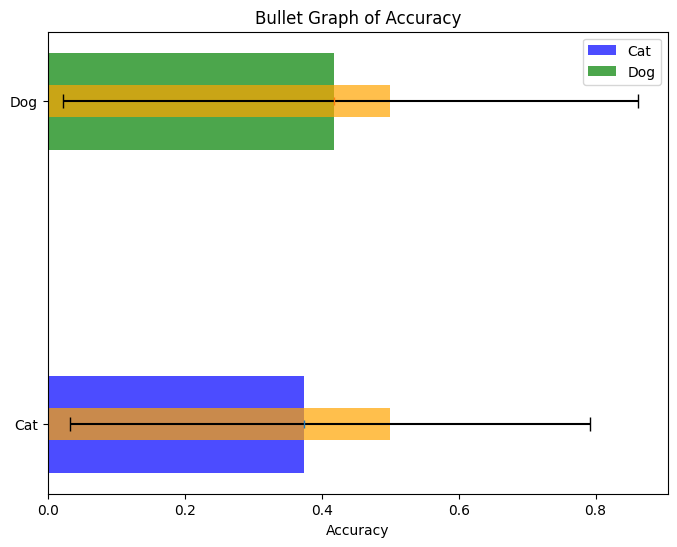

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy data for cats and dogs
cat_accuracies = []
dog_accuracies = []

# Separate images based on their labels and collect accuracy data
for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(accuracy)
    else:  # Dog label
        dog_accuracies.append(accuracy)

# Calculate average accuracy for cats and dogs
avg_cat_accuracy = np.mean(cat_accuracies)
avg_dog_accuracy = np.mean(dog_accuracies)

# Define target and range values for the bullet graph
target = [0.5]  # Target value (e.g., desired accuracy)
range_vals = [0, 1]  # Range of values (minimum and maximum accuracy)

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot bars for cats
ax.barh(0, avg_cat_accuracy, color='blue', height=0.3, alpha=0.7, label='Cat')
ax.barh(0, target[0], color='orange', height=0.1, alpha=0.7)  # Target line
ax.errorbar(avg_cat_accuracy, 0, xerr=[[min(cat_accuracies)], [max(cat_accuracies)]], fmt='|', ecolor='black', capsize=5)

# Plot bars for dogs
ax.barh(1, avg_dog_accuracy, color='green', height=0.3, alpha=0.7, label='Dog')
ax.barh(1, target[0], color='orange', height=0.1, alpha=0.7)  # Target line
ax.errorbar(avg_dog_accuracy, 1, xerr=[[min(dog_accuracies)], [max(dog_accuracies)]], fmt='|', ecolor='black', capsize=5)

# Add labels and title
ax.set_yticks([0, 1])
ax.set_yticklabels(['Cat', 'Dog'])
ax.set_xlabel('Accuracy')
ax.set_title('Bullet Graph of Accuracy')

# Add legend
ax.legend()

plt.show()


# Predict probabilities for each image

1/1 [==============================] - 0s 130ms/step


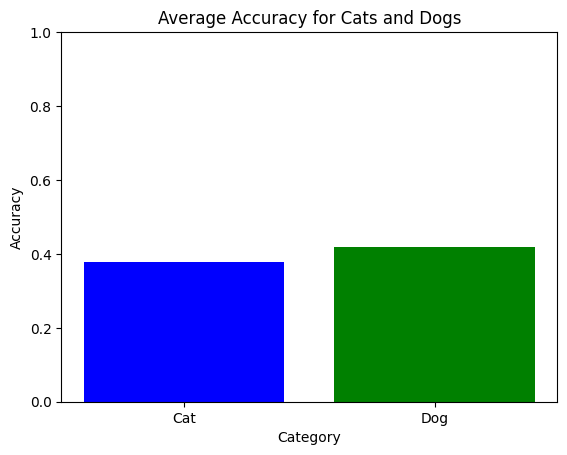

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy data for cats and dogs
cat_accuracies = []
dog_accuracies = []

# Separate images based on their labels and collect accuracy data
for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(accuracy)
    else:  # Dog label
        dog_accuracies.append(accuracy)

# Calculate average accuracy for cats and dogs
avg_cat_accuracy = np.mean(cat_accuracies)
avg_dog_accuracy = np.mean(dog_accuracies)

# Plotting
categories = ['Cat', 'Dog']
accuracies = [avg_cat_accuracy, avg_dog_accuracy]

plt.bar(categories, accuracies, color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.title('Average Accuracy for Cats and Dogs')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1 for accuracy scores
plt.show()


# Create bar chart for cat accuracies

1/1 [==============================] - 0s 129ms/step


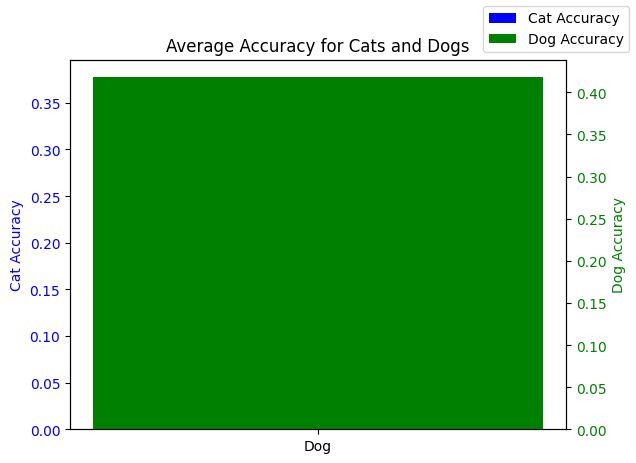

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy data for cats and dogs
cat_accuracies = []
dog_accuracies = []

# Separate images based on their labels and collect accuracy data
for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(accuracy)
    else:  # Dog label
        dog_accuracies.append(accuracy)

# Calculate average accuracy for cats and dogs
avg_cat_accuracy = np.mean(cat_accuracies)
avg_dog_accuracy = np.mean(dog_accuracies)

# Plotting
fig, ax1 = plt.subplots()

# Create bar chart for cat accuracies
ax1.bar('Cat', avg_cat_accuracy, color='blue', label='Cat Accuracy')
ax1.set_ylabel('Cat Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for dog accuracies
ax2 = ax1.twinx()
ax2.bar('Dog', avg_dog_accuracy, color='green', label='Dog Accuracy')
ax2.set_ylabel('Dog Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
fig.legend(loc='upper right')

plt.title('Average Accuracy for Cats and Dogs')
plt.show()


# Create bar chart for cat accuracies

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize lists to store accuracy data for cats and dogs
cat_accuracies = []
dog_accuracies = []

# Separate images based on their labels and collect accuracy data
for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0:  # Cat label
        cat_accuracies.append(accuracy)
    else:  # Dog label
        dog_accuracies.append(accuracy)

# Plotting
fig, ax1 = plt.subplots()

# Create bar chart for cat accuracies
for i, cat_accuracy in enumerate(cat_accuracies):
    ax1.bar(f'Cat {i+1}', cat_accuracy, color='blue', label='Cat Accuracy')

ax1.set_ylabel('Cat Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for dog accuracies
ax2 = ax1.twinx()
ax2.bar('Dog', np.mean(dog_accuracies), color='green', label='Dog Accuracy')
ax2.set_ylabel('Dog Accuracy', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add legend
fig.legend(loc='upper right')

plt.title('Accuracy for Cats and Dogs')
plt.show()


# Plotting the pie chart

1/1 [==============================] - 0s 229ms/step


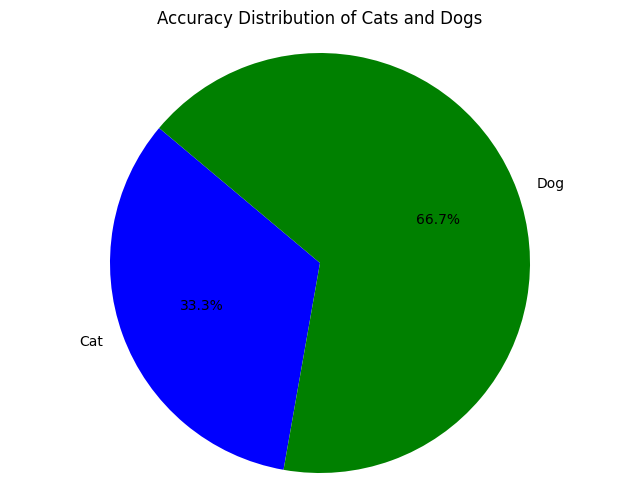

In [ ]:
import matplotlib.pyplot as plt

# Load a batch of images from the generator
batch_images, batch_labels = train_generator.next()

# Predict probabilities for each image
batch_probabilities = model.predict(batch_images)

# Initialize counters for cat and dog accuracies
cat_accuracy_count = 0
dog_accuracy_count = 0

# Count the number of accurate predictions for cats and dogs
for i in range(len(batch_labels)):
    accuracy = batch_probabilities[i][0]
    if batch_labels[i] == 0 and accuracy > 0.41:  # Cat label and accuracy greater than 0.41
        cat_accuracy_count += 1
    elif batch_labels[i] == 1 and accuracy > 0.41:  # Dog label and accuracy greater than 0.41
        dog_accuracy_count += 1

# Labels for the sections of the pie chart
labels = ['Cat', 'Dog']

# Accuracy counts for cats and dogs
accuracies = [cat_accuracy_count, dog_accuracy_count]

# Colors for each section
colors = ['blue', 'green']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(accuracies, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Distribution of Cats and Dogs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Perform entity recognition using spaCy

In [ ]:
import spacy
from textblob import TextBlob

# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Sample text for analysis
text = "Apple is going to launch its new iPhone next month. The company expects high sales and positive customer feedback. Tim Cook, the CEO of Apple, announced the news yesterday."

# Perform sentiment analysis using TextBlob
blob = TextBlob(text)
sentiment = blob.sentiment

print("Sentiment Analysis:")
print("Polarity:", sentiment.polarity)  # Polarity ranges from -1 to 1 (negative to positive)
print("Subjectivity:", sentiment.subjectivity)  # Subjectivity ranges from 0 to 1 (objective to subjective)
print()

# Perform entity recognition using spaCy
doc = nlp(text)

print("Entity Recognition:")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)
print()

# Perform relationship extraction (e.g., find organizations and their CEOs) using spaCy
print("Relationship Extraction:")
for ent in doc.ents:
    if ent.label_ == "ORG":  # Filter entities that represent organizations
        for token in ent.subtree:
            if token.dep_ == "nsubj" and token.ent_type_ == "PERSON":  # Find subject of organization (e.g., CEO)
                print(ent.text, "-", token.text)
                break
print()


Sentiment Analysis:
Polarity: 0.13090909090909092
Subjectivity: 0.38499999999999995

Entity Recognition:
Apple - ORG
iPhone - ORG
next month - DATE
Tim Cook - PERSON
Apple - ORG
yesterday - DATE

Relationship Extraction:



In [ ]:
!pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 28.4 MB/s eta 0:00:00


In [ ]:
!apt-get install python3-pyaudio
!pip install pyaudio


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2
Suggested packages:
  python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 python3-pyaudio
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 91.2 kB of archives.
After this operation, 340 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-pyaudio amd64 0.2.11-1.3ubuntu1 [25.9 kB]
Fetched 91.2 kB in 1s (167 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Selecting previously unselected package python3-pyaudio.
Prepa

In [ ]:
!pip install pydub

import speech_recognition as sr
from pydub import AudioSegment
from pydub.silence import split_on_silence

# Initialize recognizer
recognizer = sr.Recognizer()

# Capture audio from microphone
print("Speak something...")
audio = AudioSegment.silent(duration=1000)  # Add 1 second of silence at the beginning
with sr.Microphone() as source:
    audio += AudioSegment.from_file(source)

# Recognize speech using Google Web Speech API
try:
    print("Transcribing speech...")
    text = recognizer.recognize_google(audio)
    print("You said:", text)
except sr.UnknownValueError:
    print("Sorry, could not understand audio.")
except sr.RequestError as e:
    print("Error retrieving speech recognition results; {0}".format(e))


Speak something...


OSError: No Default Input Device Available